In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zhengqi/zhengqi_train.txt
/kaggle/input/zhengqi/zhengqi_test.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [5]:
train_data_file = "/kaggle/input/zhengqi/zhengqi_train.txt"
test_data_file =  "/kaggle/input/zhengqi/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [11]:
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
train_corr = data_train1.corr()
train_corr

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.298443,0.751830,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.310120,0.656186,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.346006,0.059941,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,0.321262,0.306397,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,0.141129,0.927685,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.415660,-0.087312,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.310982,-0.036791,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.419703,0.420557,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,1.000000,0.140462,...,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.026846,0.922190,-0.045851,0.394767
V12,0.751830,0.656186,0.059941,0.306397,0.927685,-0.087312,-0.036791,0.420557,0.140462,1.000000,...,0.666775,0.028866,0.441963,-0.007658,0.046674,0.010122,0.081963,0.112150,-0.054827,0.594189


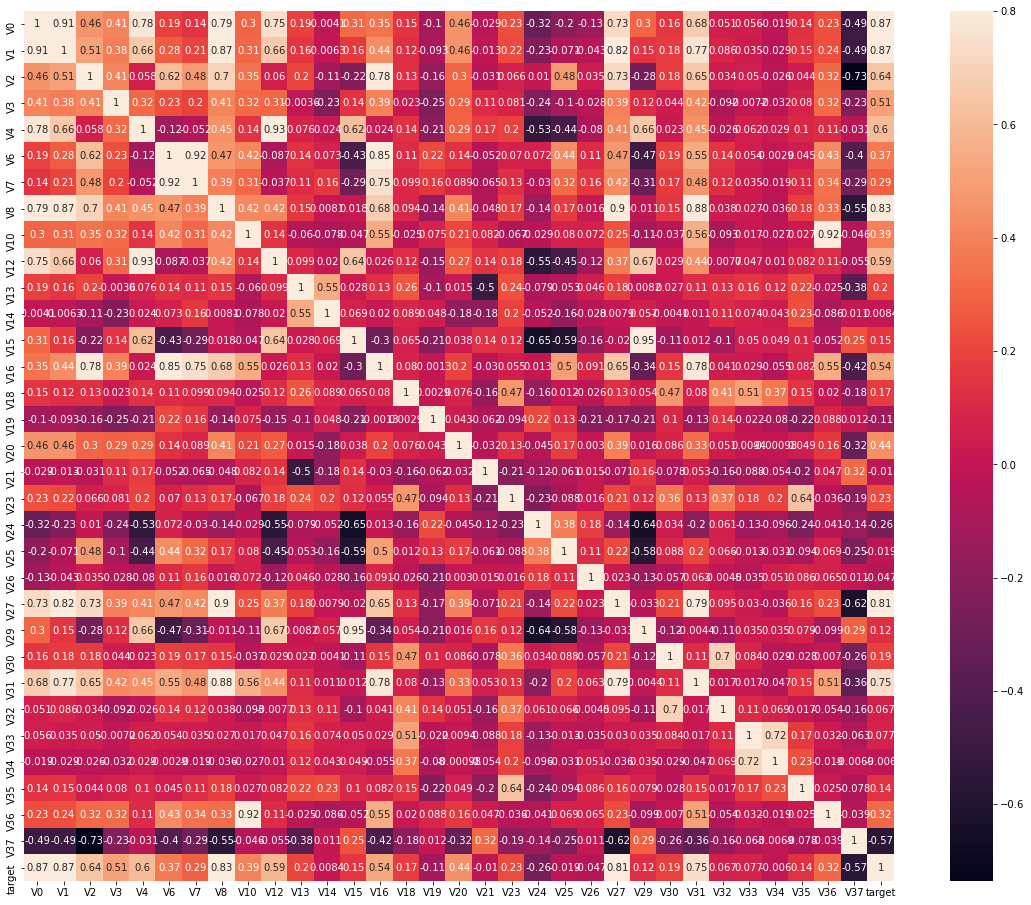

In [12]:
# 画出相关性热力图
ax = plt.subplots(figsize=(20, 16))#调整画布大小

ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数

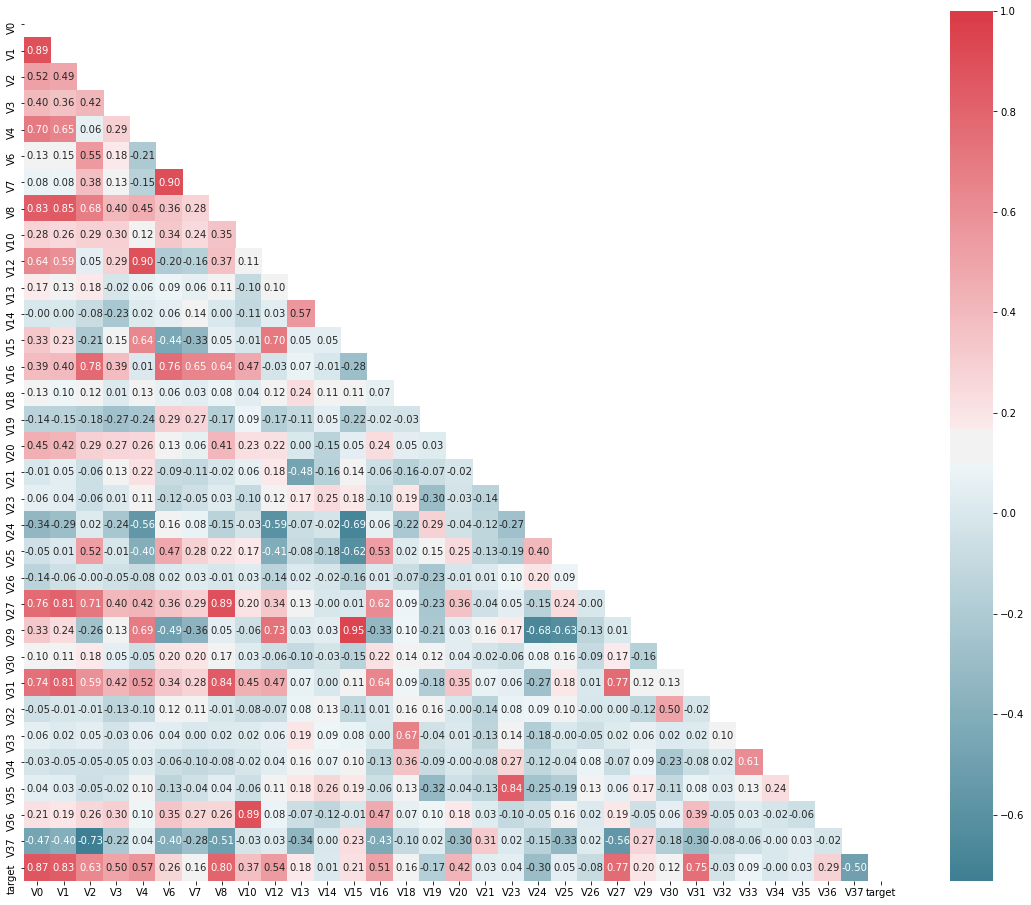

In [13]:
# 找出相关程度
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)

plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

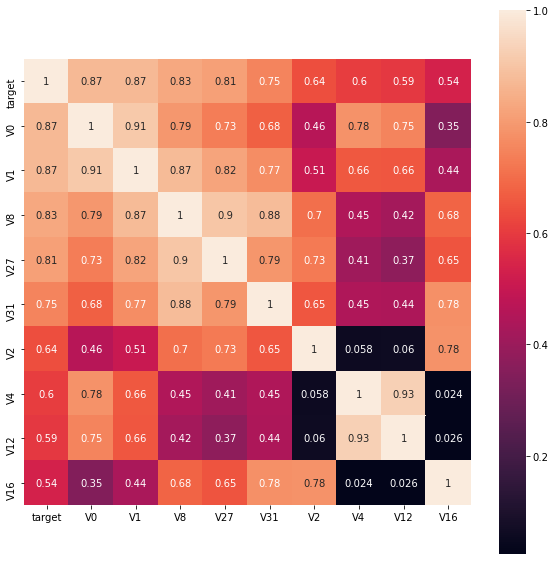

In [14]:
#寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))#调整画布大小
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True)
#g = sns.heatmap(train_data[cols].corr(),annot=True,square=True,cmap="RdYlGn")
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)

plt.show()

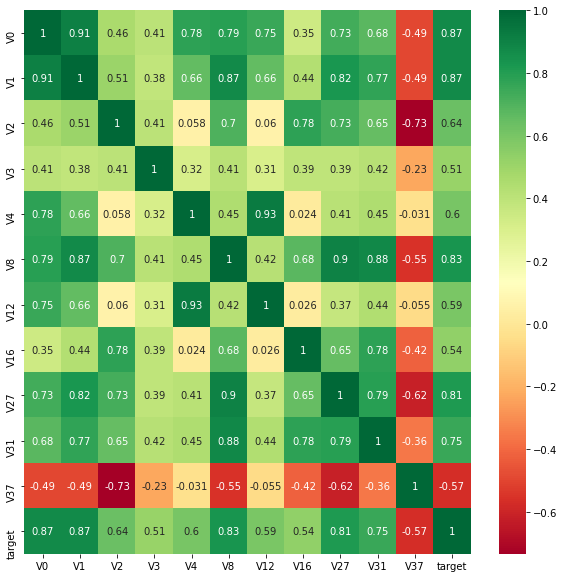

In [15]:
## 查找出特征变量和target变量相关系数大于0.5的特征变量

threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
# Threshold for removing correlated variables
threshold = 0.5

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
#data_all.drop(drop_col, axis=1, inplace=True)